In [1]:
import pandas as pd

In [2]:
from visualization.utils.qa_helpers import compare_metrics, plot_cls_P_R

### Paths preparation

In [3]:
## Paths
project_path = '/home/arazin/main/work/HUAWEI/SRC/SRC_from_remote/SRC_QC4QA'

############################# Classified domains #############################

# Data_Science_and_Machine_Learning_class domain QA generation
ds_adapter = '/data/inference/qa/Data_Science_and_Machine_Learning_class/test-256-0.8point-264_LoRa.csv'
ds_pretrain = '/data/inference/qa/Data_Science_and_Machine_Learning_class/test-256-0.9.csv'

# Database_and_SQL_class domain QA generation
sql_adapter = '/data/inference/qa/Database_and_SQL_class/test-256-0.8point-117_LoRa.csv'
sql_pretrain = '/data/inference/qa/Database_and_SQL_class/test-256-0.9.csv'

# GUI_Desktop_Applications_class domain QA generation
app_adapter = '/data/inference/qa/GUI_Desktop_Applications_class/test-256-0.8point-285_LoRa.csv'
app_pretrain = '/data/inference/qa/GUI_Desktop_Applications_class/test-256-0.9.csv'

# Networking_and_APIs_class domain QA generation
net_adapter = '/data/inference/qa/Networking_and_APIs_class/test-256-0.8point-152_LoRa.csv'
net_pretrain = '/data/inference/qa/Networking_and_APIs_class/test-256-0.9.csv'

# Other_class domain QA generation
other_adapter = '/data/inference/qa/Other_class/test-256-0.8point-612_LoRa.csv'
other_pretrain = '/data/inference/qa/Other_class/test-256-0.9.csv'

# System_Administration_and_DevOps_class domain QA generation
sys_adapter = '/data/inference/qa/System_Administration_and_DevOps_class/test-256-0.8point-246_LoRa.csv'
sys_pretrain = '/data/inference/qa/System_Administration_and_DevOps_class/test-256-0.9.csv' 

# Web_Development_class domain QA generation
web_adapter = '/data/inference/qa/Web_Development_class/test-256-0.9point-220_LoRa.csv'
web_pretrain = '/data/inference/qa/Web_Development_class/test-256-0.9.csv'

############################# Classified sentiment #############################

# API_USAGE_class domain QA generation
api_usage_adapter = '/data/inference/qa/API_USAGE_class/test-256-0.9point-528_LoRa.csv'
api_usage_pretrain = '/data/inference/qa/API_USAGE_class/test-256-0.9.csv'

In [4]:
dfs_adapter = [
    pd.read_csv(project_path + name) for name in [
        ds_adapter, 
        sql_adapter, 
        app_adapter, 
        net_adapter, 
        other_adapter, 
        sys_adapter, 
        web_adapter, 
        api_usage_adapter
        ]
    ]

dfs_pretrain = [
    pd.read_csv(project_path + name) for name in [
        ds_pretrain, 
        sql_pretrain, 
        app_pretrain, 
        net_pretrain, 
        other_pretrain, 
        sys_pretrain, 
        web_pretrain, 
        api_usage_pretrain
        ]
    ]

### NLP metrics comparison between Lora adapter and base LLM on several domains

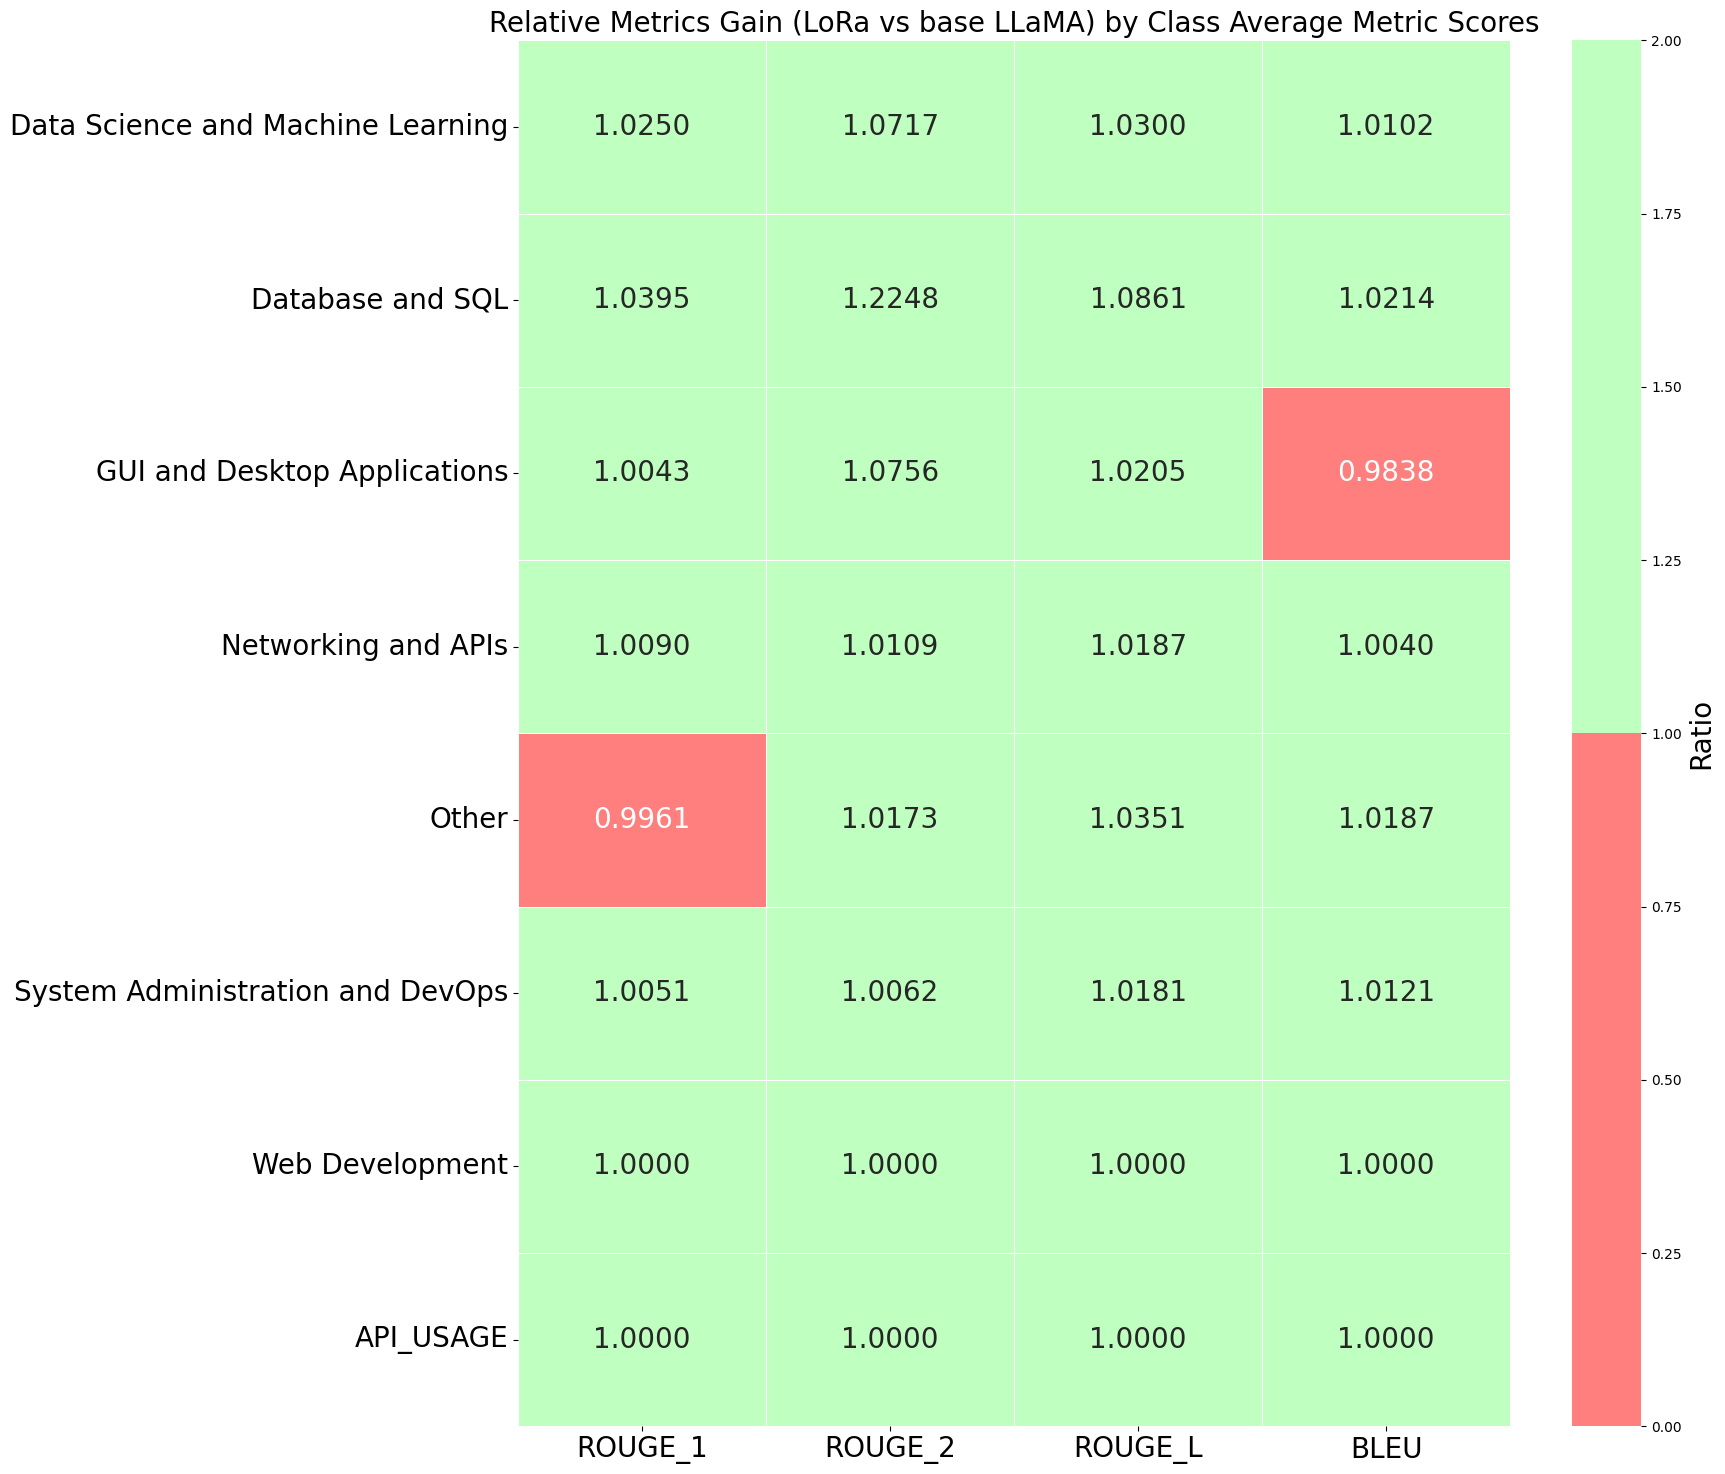

In [5]:
compare_metrics(dfs_adapter, dfs_pretrain)

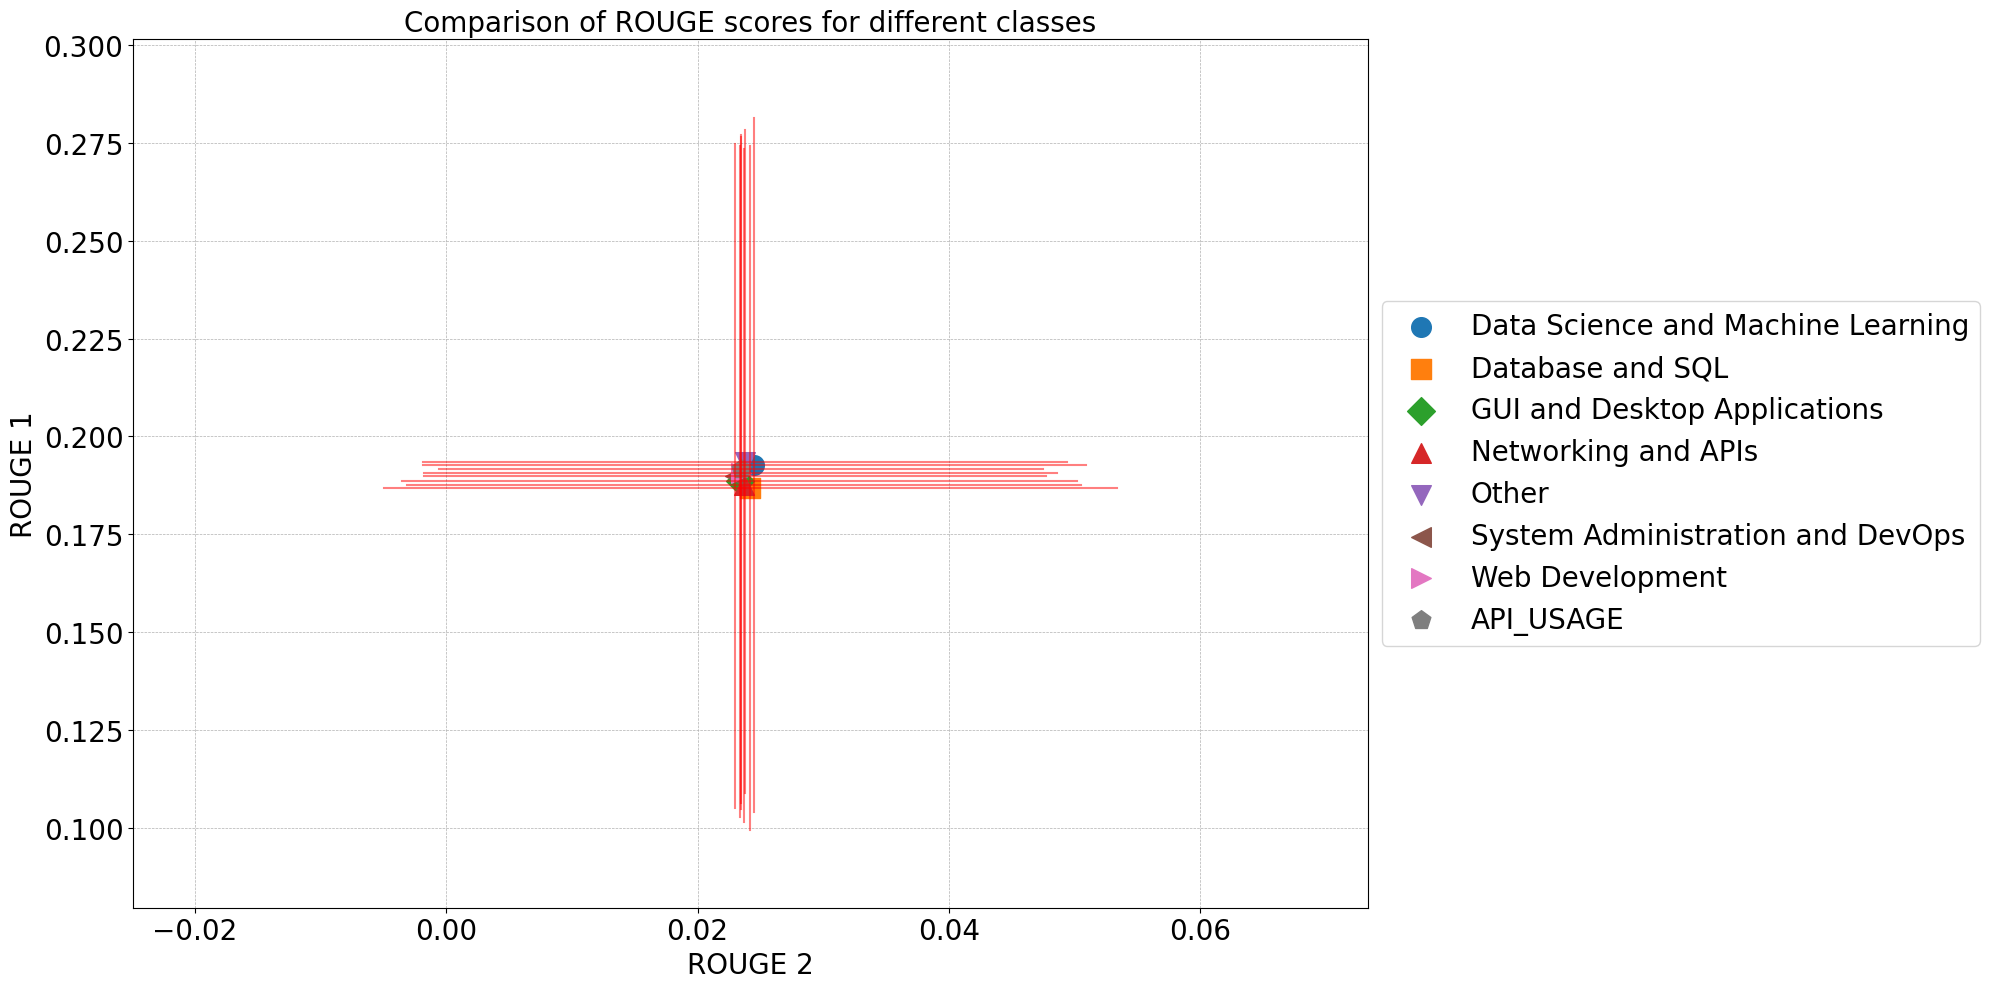

In [6]:
plot_cls_P_R(dfs_adapter)

### Code summarization influence on generated answers analysis

In [4]:
ds_description = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/notebooks/qa/data/tests/Data_Science_and_Machine_Learning_class/summ/test-256-0.9_description.csv')
ds_no_description = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/notebooks/qa/data/tests/Data_Science_and_Machine_Learning_class/summ/test-256-0.9_no_description.csv')

In [5]:
ds_no_description = ds_no_description.rename(columns={'Generated Answer': 'Generated Answer_no_d'})
ds_no_description

,Question,Answer,Title,Q_Id,Generated Answer_no_d,ROUGE_1,ROUGE_2,ROUGE_L,BLEU
0,<p>I was happy in my world of python and matpl...,"<p>You're using Python from Fink, so Xcode doe...",Matplotlib suddenly crashes after reinstalling...,0,There is a problem with installing numpy on th...,0.260870,0.017699,0.104348,0.026316
1,<p>What is the simplest/cleanest way to rescal...,<p>Maybe you should pass 16. (a float) instead...,Rescale intensities of a PIL Image,1,"If you don’t need to keep the original image, ...",0.128440,0.000000,0.091743,0.055160
2,<p>I'm using ParallelPython to develop a perfo...,<p>Parallel Python runs the sub-functions on d...,Shared value in parallel python,2,I think you might be able to do it using [pool...,0.352941,0.010811,0.160428,0.050119
3,<p>I am trying to use the scipy stats package ...,<p>just ran into the same problem and ended up...,using the stats package in scipy error in Python?,3,It appears to me that you are using Python 3.x...,0.042857,0.000000,0.042857,0.095174
4,<p>Python - Using cPickle to load a previously...,"<p>About 1.7GB seems a bit much, but not impos...",Python - Using cPickle to load a previously sa...,4,The cpickle module is meant to handle pickles ...,0.262774,0.029630,0.102190,0.028916
...,...,...,...,...,...,...,...,...,...
495,<p>I have this simple script that creates a li...,"<p>Your Code has several issues, but we will s...",How do I use pandas to compare a list of numbe...,315,The problem is that you are appending `crowd_r...,0.137615,0.009259,0.082569,0.012658
496,<p>This function is selecting -70 for the min ...,<p>Put the return statement outside the if sta...,Why is this function not returning the correct...,316,"Your `min` and `max` are updated correctly, an...",0.131980,0.020513,0.111675,0.069923
497,<p>I'm trying to concatenate new rows of data ...,<p>Simple answer</p>\n<p>Say you have <code>df...,python concatenating a list without restarting,317,It'll always append the two dataframe together...,0.192771,0.024691,0.096386,0.039966
498,<p>I have a script which goes through a simple...,<p>You use the same variable name <code>epochs...,TensorFlow: TypeError when itterating through ...,318,You could try using:\n\begin{itemize}\na. `Ker...,0.172043,0.032609,0.129032,0.052910


In [11]:
combined = pd.merge(ds_description, ds_no_description[['Generated Answer_no_d', 'Title']], on='Title',)
questions = iter(combined['Question'].values)
answers = iter(combined['Answer'].values)

description_ans = iter(combined['Generated Answer'].values)
no_description_ans = iter(combined['Generated Answer_no_d'].values)

In [29]:
print('Question')
print('-'*100)
print(next(questions))
print(' ')

print('Answer')
print('-'*100)
print(next(answers))
print(' ')

print('Description')
print('-'*100)
print(next(description_ans))
print(' ')

print('NO description')
print('-'*100)
print(next(no_description_ans))
print(' ')

Question
----------------------------------------------------------------------------------------------------
<p>I'm trying to perform a linear regression using k-fold validation, in the sunspost dataset.
In this exercise I need to take the last 10 years as test and use the rest for tranning, further I should measure the model accuracy using RMSE.
Also, I need to test k-values from 1 to 24 in order to identify the better k value (lower RMSE)
However, Im obtaining very strange RMSE values for k (ranging from -6 to -1) while it should stay closer to 16 I think, considering that sunspot values are not normalized.
(PS: For the following script I've generated the day_count column imagining that the regression model does not accept date values.)</p>

<pre><code>from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas